In [115]:
import matplotlib.pyplot as plt
import pandas as pd 
import datetime as dt
import pickle

In [116]:
#import seaborn as sns
#sns.set_theme(palette='magma')

In [117]:
from wordcloud import WordCloud

def plot_wordcloud_from_tweets(preprocessed_tweets):
  text = " ".join(" ".join(tweet) for tweet in preprocessed_tweets)

  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=[], colormap='winter', background_color="black").generate(text)

  # Display the generated image:
  # the matplotlib way:
  plt.figure(figsize=(10,8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [118]:
import pandas as pd
df = pd.read_csv('reddit_posts_2022_07_21-10_16_58_AM_no_duplicates_personnal_corrected.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20377 entries, 0 to 26443
Data columns (total 86 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   level_0                        20377 non-null  int64  
 1   index                          20377 non-null  int64  
 2   _id                            20377 non-null  object 
 3   all_awardings                  20377 non-null  object 
 4   allow_live_comments            20377 non-null  object 
 5   author                         20377 non-null  object 
 6   author_flair_css_class         0 non-null      float64
 7   author_flair_richtext          20373 non-null  object 
 8   author_flair_text              980 non-null    object 
 9   author_flair_type              20373 non-null  object 
 10  author_fullname                20373 non-null  object 
 11  author_is_blocked              13374 non-null  object 
 12  author_patreon_flair           20373 non-null 

C:\Users\hayadi\AppData\Local\Temp\ipykernel_24836\3564748381.py:2: DtypeWarning: Columns (75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('reddit_posts_2022_07_21-10_16_58_AM_no_duplicates_personnal_corrected.csv', index_col=0)


### Data Preprocessing

In [129]:
import re, string, unicodedata
import nltk
import contractions # expanding contractions
import inflect # natural language related tasks of generating plurals, singular nouns, etc.
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
import string


#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

In [130]:
import nltk
#nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hayadi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hayadi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [131]:
import sys
sys.path.append("../utils/preprocess")

In [132]:
from preprocess import Preprocess
prep = Preprocess()

In [133]:
def multiple_replacer(*key_values):
    replace_dict = dict(key_values)
    replacement_function = lambda match: replace_dict[match.group(0)]
    pattern = re.compile("|".join([re.escape(k) for k, v in key_values]), re.M)
    return lambda string: pattern.sub(replacement_function, string)

def multiple_replace(string, *key_values):
    return multiple_replacer(*key_values)(string)


In [134]:
def preprocess_post(post, replacements, stemming=True, numbers_processing='replace'):
    
    post = prep.replace_contractions(post)
    post = prep.replace_special_words(post)
    post = prep.replace_hashtags_URL_USER(post, mode_URL="delete", mode_Mentions="delete", mode_Hashtag="replace")
    post = prep.tokenize(post)
    post = prep.remove_punctuation(post)
    post = prep.preprocess_emojis(post)
    post = prep.preprocess_emoticons(post)
    post = prep.remove_non_ascii(post)
    post = prep.to_lowercase(post)
    post = prep.replace_numbers(post, mode=numbers_processing)
    post = prep.lemmatize_verbs(post)
    post = prep.remove_stopwords(post)
    if replacements:
        post = " ".join(post)
        for i in range(len(replacements)):
            post= multiple_replace(post, *replacements[i])
        post=post.split()
    if stemming:
        post = prep.stem_words(post)
    return post

def preprocess_posts(posts, *replacements, stemming=True, numbers_processing='replace'):
    return [" ".join(preprocess_post(post, replacements, stemming, numbers_processing)) for post in posts if post]

In [135]:
df['concatenated_sentences'].to_list()

['Post Covid gastrointestinal symptoms I got sick in March 2020 , was not hospitalized and because of that was not able to get tested so it is not confirmed Covid , but the symptoms seem to align with long haul Covid . Has anyone else had severe GI issues such as acid reflux , SIBO , food intolerances , and new sensitivity to any supplements / medications ? If so , has it resolved ? What helped you ?',
 'Has anyone gotten worse at 8 months ? Have any of you gotten worse at around 8 months ?',
 " Every time would ejaculate , the pain would radiate around my body , most intensely in my face . Not sure if this is a COVID symptom , or something else entirely , but I'd thought I'd ask ",
 "Timeline I looked back at my records since i've been sick on august 21 . Sick for 13 days Good for 11 days Sick for 19 days Good for 21 days Sick for 30 days Good for 20 days And today im not feeling the best but i will see how it goes ",
 "Workout Intolerance ? Plenty of times I've heard that us haulers 

In [136]:
replacements = [(u"view poll", u""), (u"httpurl", u"")]

df['long_covid_related_text_unstemmed_without_numbers'] = preprocess_posts(df['concatenated_sentences'], replacements, stemming=False, numbers_processing='delete')

INFO: Could not replace emoticon: :d of the word: :d (<class 'KeyError'>, KeyError(':d'), <traceback object at 0x0000020900E322C0>)
INFO: Could not replace emoticon: ;d of the word: ;d (<class 'KeyError'>, KeyError(';d'), <traceback object at 0x0000020918C6CA80>)
INFO: Could not replace emoticon: ;d of the word: ;d (<class 'KeyError'>, KeyError(';d'), <traceback object at 0x0000020918CEAFC0>)
INFO: Could not replace emoticon: ;d of the word: ;d (<class 'KeyError'>, KeyError(';d'), <traceback object at 0x0000020900E249C0>)
INFO: Could not replace emoticon: ;d of the word: ;d (<class 'KeyError'>, KeyError(';d'), <traceback object at 0x0000020918C78CC0>)
INFO: Could not replace emoticon: :d of the word: :d (<class 'KeyError'>, KeyError(':d'), <traceback object at 0x0000020918CE4880>)
INFO: Could not replace emoticon: ;d of the word: ;d (<class 'KeyError'>, KeyError(';d'), <traceback object at 0x0000020918CE8040>)
INFO: Could not replace emoticon: :d of the word: :d (<class 'KeyError'>, Ke

INFO: Could not replace emoticon: ;d of the word: ;d (<class 'KeyError'>, KeyError(';d'), <traceback object at 0x0000020919BD8FC0>)
INFO: Could not replace emoticon: Dx of the word: Dx (<class 'KeyError'>, KeyError('Dx'), <traceback object at 0x0000020918C666C0>)
INFO: Could not replace emoticon: :d of the word: :d (<class 'KeyError'>, KeyError(':d'), <traceback object at 0x0000020919BDACC0>)
INFO: Could not replace emoticon: ;d of the word: ;d (<class 'KeyError'>, KeyError(';d'), <traceback object at 0x0000020900E37780>)
INFO: Could not replace emoticon: Dx of the word: Dx (<class 'KeyError'>, KeyError('Dx'), <traceback object at 0x0000020918C705C0>)
INFO: Could not replace emoticon: :d of the word: :d (<class 'KeyError'>, KeyError(':d'), <traceback object at 0x0000020918C6C5C0>)
INFO: Could not replace emoticon: :d of the word: :d (<class 'KeyError'>, KeyError(':d'), <traceback object at 0x0000020900E297C0>)
INFO: Could not replace emoticon: :d of the word: :d (<class 'KeyError'>, Ke

In [137]:
df.dropna(axis=0, how='any', thresh=None, subset=['long_covid_related_text_unstemmed_without_numbers'], inplace=True)

In [138]:
df

,level_0,index,_id,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,...,discussion_type,suggested_sort,call_to_action,category,event_end,event_is_live,event_start,titled_selftext,concatenated_sentences,long_covid_related_text_unstemmed_without_numbers
0,0,0,62d6699037075c826c2d1c0b,[],0.0,Nb827618,NaN,[],NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Post Covid gastrointestinal symptoms I got sic...,Post Covid gastrointestinal symptoms I got sic...,post covid gastrointestinal symptom sick march...
1,1,1,62d6699037075c826c2d1c0c,[],False,TheChaosBringer993,NaN,[],NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Has anyone gotten worse at 8 months? Have any ...,Has anyone gotten worse at 8 months ? Have any...,anyone gotten worse month worse around month
2,2,2,62d6699037075c826c2d1c0d,[],False,sunflower_1970,NaN,[],NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bit of an odd sexual question. A pretty person...,"Every time would ejaculate , the pain would r...",every time would ejaculate pain would radiate ...
4,4,4,62d6699037075c826c2d1c0f,[],False,goalan2112,NaN,[],NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Timeline I looked back at my records since i'v...,Timeline I looked back at my records since i'v...,timeline look back record since sick august si...
5,5,5,62d6699037075c826c2d1c10,[],False,DarkHeros01,NaN,[],NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Workout Intolerance ? Plenty of times I’ve he...,Workout Intolerance ? Plenty of times I've hea...,workout intolerance plenty time hear hauler di...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26438,27208,27208,62d6bf9037075c826c2d8653,[],0.0,Obvious-Explorer7211,NaN,[],NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Recommendation for best OTC antihistamine for ...,Recommendation for best OTC antihistamine for ...,recommendation best otc antihistamine long cov...
26440,27210,27210,62d6bf9037075c826c2d8655,[],0.0,Monkeyboogaloo,NaN,[],NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Starting a trial I thought I had my long Covid...,Starting a trial I thought I had my long Covid...,start trial think long covid since december co...
26441,27211,27211,62d6bf9037075c826c2d8656,[],0.0,Apprehensive-Pay3364,NaN,[],NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Suspected long covid Hi all 44m never tested ...,Suspected long covid Hi all 44m never tested p...,suspect longcovid hi 44m never test positive c...
26442,27212,27212,62d6bf9037075c826c2d8657,[],0.0,Spiderweb12,NaN,[],NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Scottish study looking for participants for re...,but personally between being so physically li...,personally physically limited medication side ...


In [139]:
indices = df[df['long_covid_related_text_unstemmed_without_numbers'].str.len() < 4 ]['long_covid_related_text_unstemmed_without_numbers'].index
df.drop(indices, inplace=True)

In [140]:
df

,level_0,index,_id,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,...,discussion_type,suggested_sort,call_to_action,category,event_end,event_is_live,event_start,titled_selftext,concatenated_sentences,long_covid_related_text_unstemmed_without_numbers
0,0,0,62d6699037075c826c2d1c0b,[],0.0,Nb827618,NaN,[],NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Post Covid gastrointestinal symptoms I got sic...,Post Covid gastrointestinal symptoms I got sic...,post covid gastrointestinal symptom sick march...
1,1,1,62d6699037075c826c2d1c0c,[],False,TheChaosBringer993,NaN,[],NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Has anyone gotten worse at 8 months? Have any ...,Has anyone gotten worse at 8 months ? Have any...,anyone gotten worse month worse around month
2,2,2,62d6699037075c826c2d1c0d,[],False,sunflower_1970,NaN,[],NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bit of an odd sexual question. A pretty person...,"Every time would ejaculate , the pain would r...",every time would ejaculate pain would radiate ...
4,4,4,62d6699037075c826c2d1c0f,[],False,goalan2112,NaN,[],NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Timeline I looked back at my records since i'v...,Timeline I looked back at my records since i'v...,timeline look back record since sick august si...
5,5,5,62d6699037075c826c2d1c10,[],False,DarkHeros01,NaN,[],NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Workout Intolerance ? Plenty of times I’ve he...,Workout Intolerance ? Plenty of times I've hea...,workout intolerance plenty time hear hauler di...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26438,27208,27208,62d6bf9037075c826c2d8653,[],0.0,Obvious-Explorer7211,NaN,[],NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Recommendation for best OTC antihistamine for ...,Recommendation for best OTC antihistamine for ...,recommendation best otc antihistamine long cov...
26440,27210,27210,62d6bf9037075c826c2d8655,[],0.0,Monkeyboogaloo,NaN,[],NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Starting a trial I thought I had my long Covid...,Starting a trial I thought I had my long Covid...,start trial think long covid since december co...
26441,27211,27211,62d6bf9037075c826c2d8656,[],0.0,Apprehensive-Pay3364,NaN,[],NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Suspected long covid Hi all 44m never tested ...,Suspected long covid Hi all 44m never tested p...,suspect longcovid hi 44m never test positive c...
26442,27212,27212,62d6bf9037075c826c2d8657,[],0.0,Spiderweb12,NaN,[],NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Scottish study looking for participants for re...,but personally between being so physically li...,personally physically limited medication side ...


In [141]:
df.to_csv('reddit_posts_2022_07_21-10_16_58_AM_no_duplicates_personnal_concatenated_clean.csv')

In [142]:
df['long_covid_related_text_unstemmed_without_numbers'].to_list()

['post covid gastrointestinal symptom sick march hospitalize able test confirm covid symptom align long haul covid anyone else severe gi issue acid reflux sibo food intolerance new sensitivity supplement medication resolve help',
 'anyone gotten worse month worse around month',
 'every time would ejaculate pain would radiate around body intensely face sure covid symptom something else entirely would think would ask',
 'timeline look back record since sick august sick day good day sick day good day sick day good day today feel best',
 'workout intolerance plenty time hear hauler difficulty back workout routine mainly perform sort strenuous activity would set back put relapse symptom relapse symptom would consist chest pain heart palpitation headache body ache fatigue cardiologist everything check normal month long hauling still deal hypothesis push relapse prolong full recovery',
 'year worst life boring',
 'never smell taste way ever positive december birthday recover week later covidv

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20377 entries, 0 to 26443
Data columns (total 87 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   level_0                                            20377 non-null  int64  
 1   index                                              20377 non-null  int64  
 2   _id                                                20377 non-null  object 
 3   all_awardings                                      20377 non-null  object 
 4   allow_live_comments                                20377 non-null  object 
 5   author                                             20377 non-null  object 
 6   author_flair_css_class                             0 non-null      float64
 7   author_flair_richtext                              20373 non-null  object 
 8   author_flair_text                                  980 non-null    object 
 9   author

In [143]:
df.to_csv('reddit_posts_2022_07_21-10_16_58_AM_no_duplicates_personnal_concatenated_clean.csv')

In [57]:
custom_stop_words = ['covid', 'symptom', 'like', 'feel', 'day', 'month', 'anyone', 'long', 
                     'time', 'week', 'back', 'test', 'start', 'know', 'would', 'think', 'since']

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in custom_stop_words] for doc in texts]

data_words = remove_stopwords(df['long_covid_related_text_unstemmed_without_numbers'])

NameError: name 'simple_preprocess' is not defined

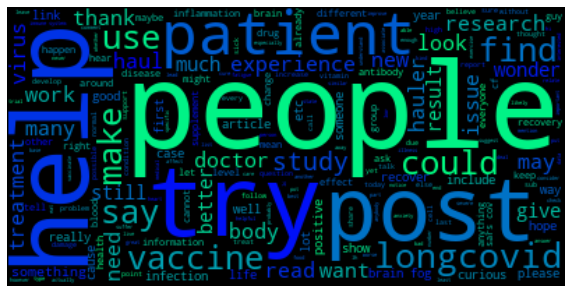

In [36]:
plot_wordcloud_from_tweets(data_words)

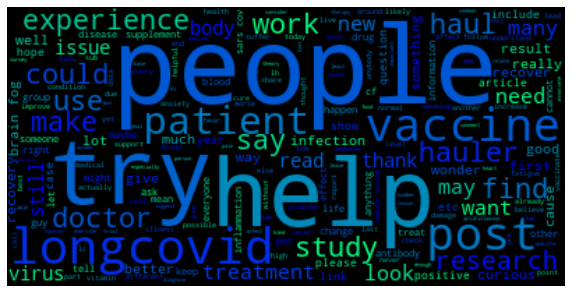

In [37]:
plot_wordcloud_from_tweets(titled_data_words)

In [38]:
# Use list comprehension to convert a list of lists to a flat list 
all_words = [item for elem in data_words for item in elem]
titled_all_words = [item for elem in titled_data_words for item in elem]

In [39]:
from collections import Counter
word_frequencies = Couner(all_words)
word_frequencies.most_common(20)

[('people', 1526),
 ('help', 1168),
 ('post', 938),
 ('try', 871),
 ('find', 745),
 ('patient', 744),
 ('study', 721),
 ('vaccine', 705),
 ('experience', 691),
 ('longcovid', 686),
 ('make', 684),
 ('say', 660),
 ('could', 638),
 ('doctor', 634),
 ('many', 609),
 ('use', 566),
 ('research', 561),
 ('want', 556),
 ('work', 550),
 ('may', 502)]

In [40]:
word_frequencies = Counter(titled_all_words)
word_frequencies.most_common(20)

[('people', 1694),
 ('help', 1432),
 ('post', 1120),
 ('try', 1058),
 ('vaccine', 1028),
 ('longcovid', 958),
 ('study', 846),
 ('find', 820),
 ('experience', 819),
 ('patient', 787),
 ('doctor', 747),
 ('make', 744),
 ('say', 708),
 ('hauler', 698),
 ('could', 694),
 ('haul', 690),
 ('many', 689),
 ('research', 667),
 ('work', 624),
 ('brain', 621)]

In [41]:
#see that index for assessing topic modeling algorithms or for choosing the value of n (the number of topics to work on) 

### Co-occurences 

In [42]:
from nltk import bigrams
import itertools
import collections

# Create list of lists containing bigrams in redit posts
terms_bigram = [list(bigrams(post)) for post in data_words]
# Flatten list of bigrams in clen tweets
bigrams = list(itertools.chain(*terms_bigram))
bigram_counts = collections.Counter(bigrams)

In [43]:
NB_PAIRS = 100
bigram_counts.most_common(NB_PAIRS)

[(('brain', 'fog'), 243),
 (('sars', 'cov'), 199),
 (('immune', 'system'), 159),
 (('many', 'people'), 114),
 (('side', 'effect'), 89),
 (('heart', 'rate'), 72),
 (('viral', 'persistence'), 66),
 (('spike', 'protein'), 66),
 (('post', 'viral'), 66),
 (('anti', 'inflammatory'), 64),
 (('nervous', 'system'), 64),
 (('shortness', 'breath'), 61),
 (('mast', 'cell'), 61),
 (('clinical', 'trial'), 58),
 (('immune', 'response'), 57),
 (('lot', 'people'), 57),
 (('share', 'experience'), 55),
 (('hi', 'everyone'), 49),
 (('help', 'people'), 48),
 (('chest', 'pain'), 48),
 (('blood', 'pressure'), 46),
 (('chronic', 'fatigue'), 44),
 (('cannot', 'find'), 44),
 (('could', 'help'), 44),
 (('make', 'sense'), 43),
 (('critical', 'illness'), 43),
 (('people', 'say'), 42),
 (('please', 'share'), 42),
 (('mental', 'health'), 42),
 (('people', 'experience'), 41),
 (('make', 'worse'), 39),
 (('recovery', 'story'), 37),
 (('mitochondrial', 'function'), 37),
 (('autoimmune', 'disease'), 36),
 (('low', 'hist